# 32-8 Ferromagnetism


:::{admonition} Prompts
:class: tip

- What is exchange coupling in ferromagnetism? Why does ferromagnetism disappear above the Curie temperature?
- What are magnetic domains? How do they explain hysteresis and the shape of a hysteresis loop?
- For a ferromagnetic sample at a given $T$ and $B$, compare the energy of dipole orientations with thermal energy. Why does heating reduce magnetization?
- What is a metastable state? How does it relate to hysteresis?
:::

## Lecture Notes

### Overview: ferromagnetism

- **Ferromagnetic materials**: Iron, nickel, cobalt, and certain alloys
- **Strong magnetization**: Dipoles align and **remain aligned** after $\vec{B}_{\text{ext}}$ is removed
- **Exchange coupling**: Quantum mechanical interaction that locks neighboring dipoles parallel
- **Domains**: Regions of aligned dipoles; domain walls separate differently oriented domains

---

### Curie temperature

For the 2D Ising model with coupling $J=1$, $T_c \approx 2.27\,J$.

**Curie–Weiss law** (above $T_c$): For small fields $B$, magnetization responses as 

$$
M \propto \frac{B}{T - T_c}
$$ (eq-curie-weiss)

Diverge as $T \to T_c^+$, signaling the onset of ferromagnetic order.

- **Above Curie temperature** $T_c$: Above the Curie temperature, ferromagnetism **disappears**; material becomes paramagnetic
- **Below** $T_c$: Domains can form; material can retain magnetization (ferrormagnetic)

:::{admonition} Physical intuition
:class: note

Spin exchange coupling (interaction) favors parallel alignment. Thermal energy $k_B T$ favors randomization. When $k_B T \gtrsim$ spin interaction energy, alignment is destroyed.
:::

---

### Hysteresis

:::{margin}
:::{figure} ../assets/figs/32-8_hysteresis.png
:name: fig-hysteresis
:width: 90%

$M$ vs $B$ hysteresis loop showing remanence $M_r$ and coercive field $B_c$.
:::
:::

**Hysteresis loop**: $M$ depends on *history* of applied field, not just current value. Cycling $B$ traces a loop:

- **Remanence** $M_r$: Magnetization when $B = 0$ (after saturation). It measures how strongly the material retains magnetization once the field is removed.
- **Coercivity** $B_c$: Field needed to reduce $M$ to zero. It characterizes how hard it is to *reverse* the magnetization.

**Applications**: 
- Permanent magnets (high $M_r$, $B_c$).
- Transformer cores (low $B_c$).

:::{admonition} Metastable states and hysteresis
:class: note

Hysteresis reflects **metastable states**: the system can get "stuck" in a magnetization that is not the unique equilibrium under the external field. Think of a ball in a shallow bowl—it stays until you push hard enough; then it rolls to a lower state. Domain walls and pinning create energy barriers, so $M$ does not instantly follow the external field $B$.
:::

---

### Summary

- **Ferromagnetism**: Exchange coupling aligns dipoles; strong, persistent magnetization
- **Curie temperature** $T_c$: Above $T_c$, ferromagnetism is lost
- **Domains**: Regions of aligned dipoles; hysteresis from domain reorientation
- **Hysteresis loop**: $M$ depends on history; remanence and coercivity characterize the loop
- **Torque and force**: See 32-6 Diamagnetism for the unified discussion (ferromagnetic samples attracted to stronger field)

## Project: The Memory of Magnets

**Why does a magnet "remember" which way it was magnetized?** After you remove the external field, the magnetization persists—as if the material holds a memory. That memory is not stored in any single atom. It is a **collective phenomenon**.

:::{sidebar} From magnets to machine learning
:class: seealso

The idea that collective spin systems can "remember" states inspired the **Hopfield model** (1982)—an early neural network where memories are stored by learned Ising couplings. John Hopfield and Geoffrey Hinton were awarded the **2024 Nobel Prize in Physics** for foundational discoveries in artificial neural networks.

:::{subfigure} AB
:name: fig-nobel-laureates
:subcaptions: above

```{image} ../assets/images/hopfield-2024.jpg
:alt: John J. Hopfield
:width: 100%
```

```{image} ../assets/images/hinton-2024.jpg
:alt: Geoffrey Hinton
:width: 100%
```

John J. Hopfield and Geoffrey Hinton — 2024 Nobel Prize in Physics. *Photos: © Nobel Prize Outreach. [Source](https://www.nobelprize.org/prizes/physics/2024/summary/)*
:::

Each atom carries a magnetic spin. In a ferromagnet, neighboring spins *talk* to each other: they prefer to align. When one spin flips—a random thermal fluctuation—its neighbors pull it back. The majority consensus holds. This self-reinforcing feedback acts like error correction: stray spin flips are resisted and corrected by the collective. The "memory" is the consensus of millions of spins making a collective decision.

To simulate this, we need a minimal model. The **Ising model**: each site has a spin ↑ or ↓; neighbors prefer to align; an external field $B$ favors one direction.

$$
E = -J \sum_{\langle i,j \rangle} s_i s_j - h \sum_i s_i
$$ (eq-ising-energy)

**Ising variables:** $s_i = \pm 1$ at each site $i$; $\langle i,j \rangle$ denotes nearest-neighbor pairs.

- **$J > 0$:** Ferromagnetic coupling—neighbors prefer to align (parallel spins lower the energy).
- **$h \propto B$:** External field—favors spins pointing in the field direction.

Each spin looks at its neighbors and the external field; it feels pressure to align with both. Spins influence each other and, together, reach collective consistency. The interplay between spin–spin interaction and the external field creates the rich behavior—including hysteresis and remanence—that we see in real magnets.

### Explore the Model

Three numerical experiments let you explore ferromagnetism with the 2D Ising model. **Run the cells in order** (top to bottom). Each experiment has a short description followed by a code cell—run the code to launch the interactive widget or plot.

1. **Experiment 1**: Spin configuration — watch domains form and break as you change $T$ and $B$.
2. **Experiment 2**: Hysteresis loop — sweep $B$ and see how $M$ lags behind; compare below, near, and above $T_c$.
3. **Experiment 3**: Curie–Weiss law — measure $M(T)$ at fixed $B$ and fit to extract $T_c$.

**Setup:** Run the setup cell below first, then run the `IsingSimulator` cell. All three experiments use this Monte Carlo engine. You only need to run each once; then run each experiment's code cell to launch its widget.


:::{admonition} For the curious: Monte Carlo and the code
:class: seealso dropdown

**Why Monte Carlo?** We want to sample spin configurations with probability proportional to $e^{-E/k_B T}$ (Boltzmann distribution). We cannot enumerate all $2^{L^2}$ states. Instead, we build a *Markov chain*: start from some configuration, repeatedly propose small changes, and accept or reject them so that the chain converges to the Boltzmann distribution.



**Two algorithms in `IsingSimulator`**

The class uses two different update schemes, each suited to a different task:

1. **Metropolis algorithm** (`update` → `_update_kernel`): Used for the *step-by-step* spin-configuration widget (Experiment 1).

   - **Propose:** Pick a random spin $i$ and flip it: $s_i \to -s_i$.
   - **Energy change:** Only the chosen spin and its 4 neighbors contribute. Flipping $s_i$ changes the energy by

     $$\Delta E = 2J\, s_i \sum_{\text{neighbors}} s_j + 2h\, s_i$$
     
   - **Accept:** With probability $P = \min(1, e^{-\Delta E/T})$. If $\Delta E \le 0$ (energy decreases or stays same), always accept. If $\Delta E > 0$, accept with probability $e^{-\Delta E/T}$.
   - **One "sweep"** = $L^2$ such attempts (one per site on average).

   In the code, `_update_kernel` picks a random site, computes `ΔE` from the neighbor sum, and flips if `np.random.random() <= min(1, exp(-ΔE/T))`.

2. **Checkerboard Gibbs sampling** (`equilibrate`): Used for *fast equilibration* in hysteresis and Curie–Weiss runs (Experiments 2 and 3).

   - **Divide** the lattice into two sublattices (checkerboard: even vs odd $(i+j)$).
   - **Update** all spins on one sublattice *simultaneously*. Each spin $s_i$ is drawn from the conditional distribution given its 4 neighbors—no rejections.
   - **Probability** that $s_i = +1$ given neighbors: $P_{\uparrow} = 1/(1 + e^{-2\beta H})$, where $H = J \sum_{\text{neighbors}} s_j + h$.
   - **Alternate** between the two sublattices for many sweeps.

   This is faster than Metropolis because many spins update per sweep and there are no rejections.


**Method guide**

| Method | Role |
|--------|------|
| `__init__` | Store $J$, $T$, $h$, system size; call `reset` to create initial random spins. |
| `reset` | Initialize `spin_config` (random ±1 or from given array). |
| `update(steps)` | Run `steps` Metropolis single-spin flips; default one sweep ($L^2$ steps). |
| `equilibrate(sweeps)` | Run `sweeps` checkerboard Gibbs sweeps to reach equilibrium. |
| `magnetization` | Return (mean $M$, std) over batches for error bars. |

**Physical units:** $k_B = 1$; $T$ and $J$ in the same units; $h \propto B$.
:::

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

# Setup
%matplotlib inline
%config InlineBackend.close_figures = False

# Define the IsingSimulator class
class IsingSimulator:
    """Numba-accelerated 2D Ising model Monte Carlo simulator."""

    def __init__(self, batch_size=1, system_size=16, spin_config=None, J=1.0, T=2.0, h=0.0):
        self.batch_size = batch_size
        self.system_size = system_size
        self.J = J  # coupling constant
        self.T = T  # temperature (k_B=1)
        self.h = h  # external field (Ising convention)
        self.reset(spin_config)

    @property
    def magnetization(self):
        """(mean, std) over batches. mean = batch mean of per-config magnetization; std for error bars."""
        m_per_batch = self.spin_config.astype(np.float64).mean(axis=(1, 2))
        return float(m_per_batch.mean()), float(m_per_batch.std(ddof=1)) if len(m_per_batch) > 1 else 0.0

    def reset(self, spin_config=None):
        if spin_config is None:
            self.spin_config = 2 * np.random.randint(2, size=(self.batch_size, self.system_size, self.system_size)) - 1
        else:
            if hasattr(spin_config, 'numpy'):
                spin_config = spin_config.numpy()
            self.batch_size = spin_config.shape[0]
            self.system_size = spin_config.shape[1]
            self.spin_config = np.asarray(spin_config, dtype=np.int8)

    def update(self, steps=None):
        """Single-spin Metropolis update (for step-by-step teaching demo)."""
        N, L = self.batch_size, self.system_size
        if steps is None:
            steps = L * L
        s_flat = np.ascontiguousarray(self.spin_config.reshape(N, -1), dtype=np.int8)
        self._update_kernel(s_flat, L, self.J, self.T, self.h, steps)
        self.spin_config = s_flat.reshape(N, L, L)

    def equilibrate(self, sweeps=100):
        """Checkerboard Gibbs update for fast equilibration. Use for hysteresis/magnetization curves."""
        L = self.system_size
        s = np.ascontiguousarray(self.spin_config, dtype=np.int8)
        beta = 1.0 / self.T
        mask = (np.add.outer(np.arange(L), np.arange(L)) % 2 == 0)
        masks = [mask, ~mask]  # even and odd sublattices
        for _ in range(sweeps):
            for mask in masks:
                sum_n = np.roll(s, 1, axis=1) + np.roll(s, -1, axis=1) + np.roll(s, 1, axis=2) + np.roll(s, -1, axis=2)
                H = self.J * sum_n.astype(np.float64) + self.h
                P_up = 1.0 / (1.0 + np.exp(-2.0 * beta * H))
                u = np.random.random(s.shape)
                new_spin = (2 * (u < P_up).astype(np.int8) - 1)
                s[:, mask] = new_spin[:, mask]
        self.spin_config = s

    def redraw(self, batch_idx=0):
        """Update display."""
        if not hasattr(self, '_fig') or self._fig is None:
            self._fig, self._ax = plt.subplots(figsize=(3, 3))
            self._im = self._draw_spin_config(self._fig, self._ax, batch_idx)
            self._fig.canvas.header_visible = False
            self._fig.canvas.toolbar_visible = False
            self._fig.canvas.footer_visible = False
        else:
            self._im.set_data((1 - self.spin_config[batch_idx]) / 2)
        self._fig.canvas.draw_idle()

    def _draw_spin_config(self, fig, ax, batch_idx=0):
        """Draw spin config with common styling. Returns the AxesImage for in-place updates."""
        data = (1 - self.spin_config[batch_idx]) / 2  # -1→black, +1→white
        im = ax.imshow(data, cmap='binary', vmin=0, vmax=1)
        ax.set_xticks([])
        ax.set_yticks([])
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1.5)
        fig.suptitle('Spin configuration', fontsize=10)
        fig.text(0.5, 0.02, 'Black: spin ↓, White: spin ↑', ha='center', fontsize=9)
        fig.subplots_adjust(left=0, right=1, top=0.9, bottom=0.1)
        return im

    @staticmethod
    @njit
    def _update_kernel(s_flat, L, J, T, h, steps):
        """Compiled MC update. s_flat: (N, L*L) int8 spin config, modified in place."""
        N, n_sites = s_flat.shape[0], L * L
        for _ in range(steps):
            for b in range(N):
                i = np.random.randint(0, n_sites)
                i1, i2 = i // L, i % L
                il = ((i1 - 1) % L) * L + i2
                ir = ((i1 + 1) % L) * L + i2
                ib = i1 * L + (i2 - 1) % L
                it = i1 * L + (i2 + 1) % L
                s_i = s_flat[b, i]
                sum_n = s_flat[b, il] + s_flat[b, ir] + s_flat[b, ib] + s_flat[b, it]
                dE = 2.0 * J * s_i * sum_n + 2.0 * h * s_i
                if np.random.random() <= min(1.0, math.exp(-dE / T)):
                    s_flat[b, i] = -s_i

### Experiment 1: Spin configuration

Watch the Ising lattice evolve in real time. The simulation shows a 64×64 grid of spins: **black** = spin ↓, **white** = spin ↑.

**Run the cell below** (after the IsingSimulator cell). Then:

- **Play** / **Pause**: Start or stop the Monte Carlo dynamics.
- **T slider**: Temperature (in units of $J/k_B$). The Curie temperature $T_c \approx 2.27$.
- **B slider**: External magnetic field.
- **Refresh**: Randomize the spin configuration and start fresh.

**What to observe:**
- At **low T** (e.g. 1.5): Spins align into domains; the lattice stays mostly one color. This is the ferromagnetic phase.
- At **high T** (e.g. 3.5): Spins flip randomly; no long-range order. This is the paramagnetic phase.
- Near **$T_c$**: Domains form and break up; you see the transition between order and disorder.

In [ ]:
import matplotlib.pyplot as plt
from ipywidgets import Play, Button, FloatSlider, VBox, HBox, Layout, Output
from IPython.display import display, clear_output

plt.close('all')
plt.ioff()

sim = IsingSimulator(batch_size=1, system_size=64, T=2.0, h=0.0)

# Create figure once for reuse
fig, ax = plt.subplots()
fig.set_size_inches(3, 3)
data = (1 - sim.spin_config[0]) / 2  # -1→1 (white), +1→0 (black)
im = ax.imshow(data, cmap='binary', vmin=0, vmax=1)
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1.5)
fig.suptitle('Spin configuration', fontsize=10)
fig.text(0.5, 0.02, 'Black: spin ↓, White: spin ↑', ha='center', fontsize=9)
fig.subplots_adjust(left=0, right=1, top=0.9, bottom=0.1)

out = Output(layout=Layout(width='320px', min_width='320px', height='340px'))

def update_display(step, T, B):
    plt.ioff()
    sim.T = T
    sim.h = B
    if step > 0:
        sim.update()
    im.set_data((1 - sim.spin_config[0]) / 2)
    fig.set_size_inches(3, 3)
    with out:
        clear_output(wait=True)
        display(fig)
    plt.ion()

# Play widget – click its play button to animate; drives step count for update_display
play = Play(value=0, min=0, max=999999999, step=1, interval=16, show_repeat=False)
T_slider = FloatSlider(value=2.0, min=0.5, max=4.0, step=0.01, description='T:', style={'description_width': '20px'}, continuous_update=False)
B_slider = FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.01, description='B:', style={'description_width': '20px'}, continuous_update=False)

def on_change(change):
    update_display(play.value, T_slider.value, B_slider.value)
play.observe(on_change, 'value')
T_slider.observe(on_change, 'value')
B_slider.observe(on_change, 'value')

# Initial display (observe only fires on change)
with out:
    clear_output(wait=True)
    display(fig)

def on_refresh(b):
    plt.ioff()
    sim.reset()
    with out:
        clear_output(wait=True)
        im.set_data((1 - sim.spin_config[0]) / 2)
        fig.set_size_inches(3, 3)
        display(fig)
    plt.ion()

refresh_btn = Button(icon='refresh', description='Refresh')
refresh_btn.on_click(on_refresh)

controls_col = VBox([play, T_slider, B_slider, refresh_btn], layout=Layout(align_items='flex-start', flex='0 0 auto'))
main_hbox = HBox([out, controls_col], layout=Layout(gap='8px', align_items='flex-start'))

# out created first so update_display/on_refresh can reference it
display(main_hbox)
# Prevent inline backend from auto-displaying fig at cell end (would leak to cell output)
plt.figure(); plt.close()
plt.ion();

### Experiment 2: Hysteresis loop

The magnetization $M$ of a ferromagnet depends on the *history* of the applied field $B$, not just its current value. Sweeping $B$ up and down traces a **hysteresis loop**.

**Run the cell below** to display the interactive hysteresis plot. Use the **T slider** to change the temperature.

**What to observe:**
- **Below $T_c$** (e.g. T = 1.5): A fat loop. As $B$ goes from +2 → −2 → +2, $M$ lags behind. When $B = 0$, $M$ is nonzero—that's **remanence**. The field needed to bring $M$ to zero is the **coercive field** $B_c$.
- **Near $T_c$** (e.g. T = 2.3): The loop shrinks; the system is at the critical point.
- **Above $T_c$** (e.g. T = 3.5): The loop collapses to a single line—paramagnetic response. No memory; $M$ follows $B$ reversibly.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Hysteresis parameters
B_MIN, B_MAX = -2.0, 2.0
N_STEPS = 21
BATCH_SIZE, L = 16, 32
EQUIL_SWEEPS = 10

# Build B sequence: -2→2, 2→-2, ...
up = np.linspace(B_MIN, B_MAX, N_STEPS)
down = np.linspace(B_MAX, B_MIN, N_STEPS)
B_values = np.concatenate([up, down[1:]])

@interact(T=FloatSlider(value=2.0, min=0.5, max=4.0, step=0.01, description='T:', style={'description_width': '20px'}, continuous_update=False))
def run_hysteresis(T):
    plt.ioff()
    sim = IsingSimulator(batch_size=BATCH_SIZE, system_size=L, T=T, h=0.0)
    B_list, M_list, M_err_list = [], [], []
    for h in B_values:
        sim.h, sim.T = h, T
        sim.equilibrate(sweeps=EQUIL_SWEEPS)
        m, m_std = sim.magnetization
        B_list.append(h)
        M_list.append(m)
        M_err_list.append(m_std)
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.set_xlabel('B')
    ax.set_ylabel('M')
    ax.axhline(0, color='gray', ls='--', alpha=0.5)
    ax.axvline(0, color='gray', ls='--', alpha=0.5)
    ax.errorbar(B_list, M_list, yerr=M_err_list, fmt='o-', capsize=2, markersize=4)
    ax.set_title(f'Hysteresis (T={T:.2f})')
    plt.tight_layout()
    plt.show()
    plt.ion()

interactive(children=(FloatSlider(value=2.0, continuous_update=False, description='T:', max=4.0, min=0.5, step…

### Experiment 3: Curie–Weiss law

Above the Curie temperature $T_c$, the material is paramagnetic. For a small fixed field $B$, the magnetization follows the **Curie–Weiss law**:

$$M \propto \frac{1}{T - T_c}$$

As $T \to T_c^+$, $M$ diverges—a signature of the phase transition.

**Run the cell below** to simulate $M$ vs $T$ at a fixed small $B$ value, fit the high-temperature data to the Curie–Weiss form, and extract $T_c$. The fit (dashed line) applies to $T > T_c$; the vertical line marks the fitted $T_c$.

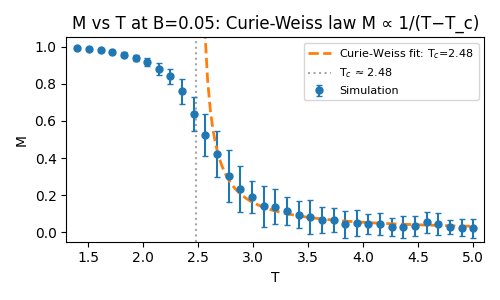

In [26]:
# M vs T at fixed small B: Curie-Weiss law M ∝ 1/(T - T_c) above T_c
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

B_FIXED = 0.05
T_HIGH, T_LOW = 5.0, 1.4
N_T = 35
BATCH_SIZE, L = 32, 32
EQUIL_SWEEPS = 50

# Scan from high T toward low T
T_values = np.linspace(T_HIGH, T_LOW, N_T)
sim = IsingSimulator(batch_size=BATCH_SIZE, system_size=L, T=T_HIGH, h=B_FIXED)
M_list, M_err_list = [], []
for T in T_values:
    sim.T = T
    sim.h = B_FIXED
    sim.equilibrate(sweeps=EQUIL_SWEEPS)
    m, m_std = sim.magnetization
    M_list.append(m)
    M_err_list.append(m_std)

M_values = np.array(M_list)
M_err = np.array(M_err_list)

# Curie-Weiss: M = C / (T - T_c) for T > T_c (paramagnetic phase)
def curie_weiss(T, C, Tc):
    return C / (T - Tc)

# Fit only high-T points (well above T_c ≈ 2.27)
mask_fit = T_values > 2.6
T_fit = T_values[mask_fit]
M_fit = M_values[mask_fit]
sigma_fit = np.maximum(M_err[mask_fit], 1e-6)
p0 = (0.5, 2.27)  # initial C, T_c
bounds = ([0, 1.5], [np.inf, 2.5])  # C>0, T_c in [1.5, 2.5]
popt, pcov = curve_fit(curie_weiss, T_fit, M_fit, p0=p0, bounds=bounds, sigma=sigma_fit, absolute_sigma=False)
C_fit, Tc_fit = popt

# Plot
fig, ax = plt.subplots(figsize=(5, 3))
fig.canvas.header_visible = False
ax.set_title(f'M vs T at B={B_FIXED}: Curie-Weiss law M ∝ 1/(T−T_c)')
ax.errorbar(T_values, M_values, yerr=M_err, fmt='o', capsize=2, markersize=5, label='Simulation')
T_smooth = np.linspace(1.01*Tc_fit, T_HIGH, 100)
ax.plot(T_smooth, curie_weiss(T_smooth, *popt), '--', color='C1', lw=2,
        label=f'Curie-Weiss fit: T$_c$={Tc_fit:.2f}')
ax.axvline(Tc_fit, color='gray', ls=':', alpha=0.7, label=f'T$_c$ ≈ {Tc_fit:.2f}')
ax.set_xlabel('T')
ax.set_ylabel('M')
ax.legend(fontsize=8)
ax.set_xlim(T_LOW - 0.1, T_HIGH + 0.1)
ax.set_ylim(-0.05, 1.05)
fig.tight_layout()
plt.show()